In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/My Drive/CocaCola_Sales_Rawdata.xlsx'
df = pd.read_excel(path)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.shape

(42, 2)

In [4]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

# Data Pre-Processing

In [6]:
# Extracting Quarter values and Year values separately from 'Quarter column'
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [7]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [8]:
# Data Splitting
Train = df.head(32)
Test = df.tail(10)

# Data Visualization

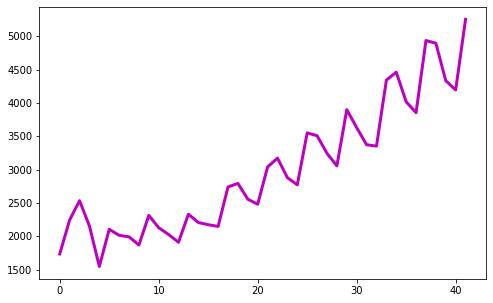

In [9]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(df['Sales'], color = 'm', linewidth=3)

#### From above lineplot of Sales values, we can state that it have Upward Linear Trend With Additive Seasonality

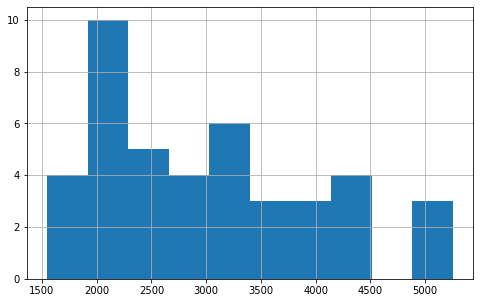

In [10]:
# Histogram
df['Sales'].hist(figsize=(8,5))

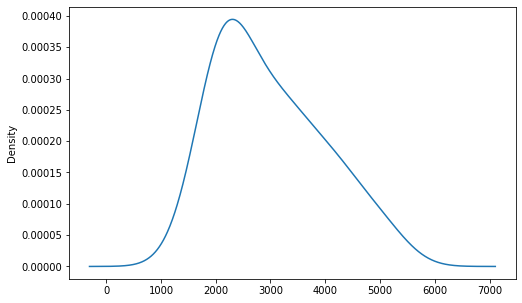

In [11]:
# Density Plot
df['Sales'].plot(kind = 'kde', figsize=(8,5))

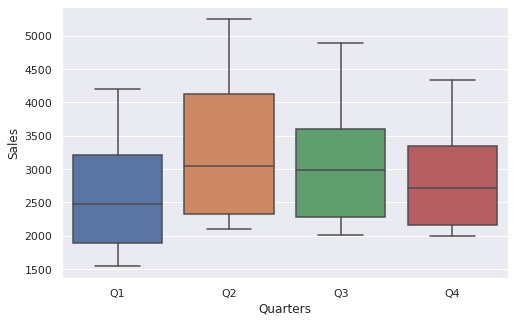

In [12]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=df)

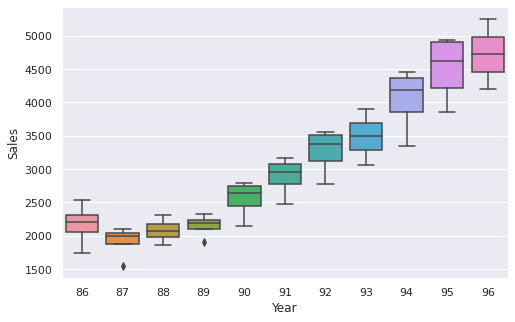

In [13]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=df)

#### Minimum sales are for the year 1986-87 and Maximum sales are for year 1996.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


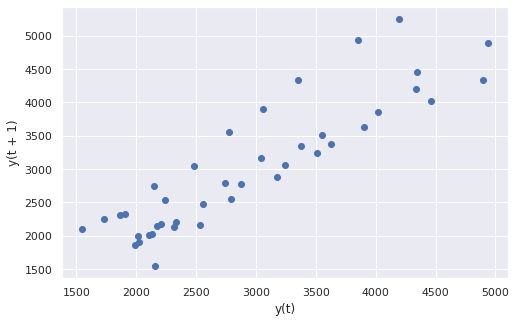

In [14]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

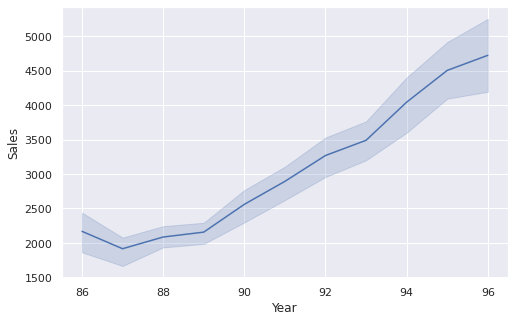

In [15]:
# Sales vs year
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=df)

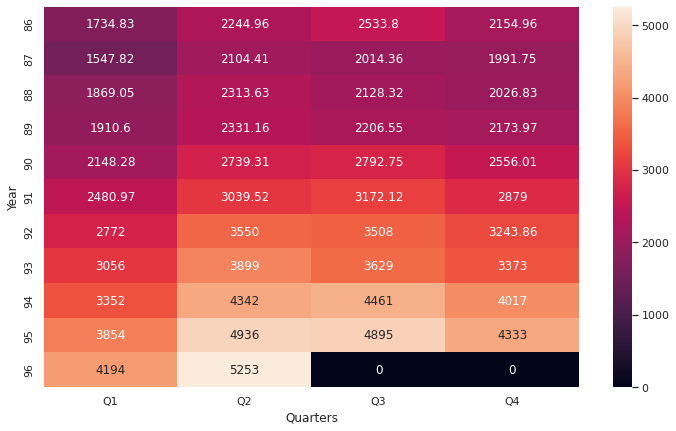

In [16]:
# Average sale in each quarter of years
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

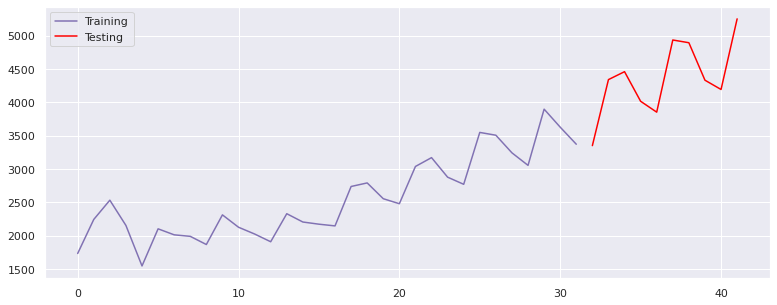

In [17]:
# Training and Testing data
_,ax = plt.subplots(figsize = (13,5))
ax.plot(Train['Sales'], color = 'm', label = 'Training')
ax.plot(Test['Sales'], color = 'red', label = 'Testing')
plt.legend()

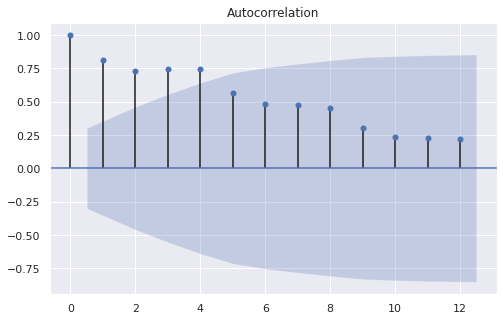

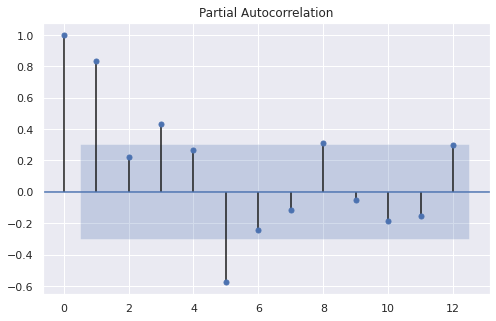

In [18]:
# ACF and PACF plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

# Modelling

## Defining evaluation criteria

In [19]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## 1. Simple Exponential Modelling

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


1034.9359056453961

## 2. Holt Method with additive trend

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(Train["Sales"], trend = 'add').fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


986.5960230950163

## 3. Holt Method with multiplicative trend

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(Train["Sales"], trend = 'mul').fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_mul = RMSE(Test.Sales, pred_hw)
rmse_hw_model_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


963.5745395467972

## 4. Holt-Winter Method with additive trend and seasonality

In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


525.355953601798

## 5. Holt-Winter Method with additive trend and multiplicative seasonality

In [24]:
hwe_model_add_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_mul = RMSE(Test.Sales, pred_hwe_add_mul)
rmse_hwe_add_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


602.2846871088122

## 6. Holt-Winter Method with multiplicative trend and additive seasonality

In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="mul",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_mul_add

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


405.83125491786495

## 7. Holt-Winter Method with multiplicative trend and seasonality

In [26]:
hwe_model_mul_mul = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="mul",seasonal_periods=4).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_mul = RMSE(Test.Sales, pred_hwe_mul_mul)
rmse_hwe_mul_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


467.6215673701829

In [27]:
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


## 8. Linear Model

In [28]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767116

## 9. Exponential Model

In [29]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076487

## 10. Quadratic Model

In [30]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554074454

## 11. ARIMA model

### Augumented Dickey Fuller test

In [41]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

### Checking Stationarity using DF test

In [42]:
adf_test(df.Sales)

Fail to reject the null hypothesis
Data is non-stationary


### Performing differencing

In [44]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['Sales'],k_diff=2)
adf_test(df['d1'])

Reject the null hypothesis
Data is stationary


In [45]:
Train = df.head(32)
Test = df.tail(10)

In [35]:
#! pip install pmdarima

In [36]:
from pmdarima import auto_arima

In [38]:
stepwise_fit = auto_arima(df['Sales'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=608.949, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=606.079, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=596.966, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=592.020, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=560.355, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=557.231, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -270.616
Date:                Mon, 27 Sep 2021   AIC                            557.231
Time:                        14:48:07   BIC                            570.940
Sample:                             0   HQIC                           562.223
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    281.4741     73.166      3.847      0.000     138.072     424.876
ar.L1         -1.0133      0.053    -19.145      0.000      -1.117      -0.910
ar.L2         -1.0044      0.064    -15.736      0.000      -1.130      -0.879
ar.L3         -0.9866      0.024    -40.791      0.000      -1.034      -0.939
ma.L1          0.9579      0.209      4.582      0.000       0.548       1.368
ma.L2          0.5389      0.280      1.925      0.054      -0.010       1.088
ma.L3          0.4664      0.179      2.607      0.009       0.116       0.817
sigma2      2.022e+04   5365.788      3.768      0.000    9702.375    3.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.67
Prob(Q):                              0.85   Prob(JB):                         0.04
Heteroskedasticity (H):               0.57   Skew:                            -0.81
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
rmse_arima = stepwise_fit.aic()
rmse_arima

557.231483802162

# Experimental analysis

In [61]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method with Additive trend',rmse_hw_model], ['Holt method with Multiplicative trend',rmse_hw_model_mul],
          ['HW with Additive trend and seasonality',rmse_hwe_add_add],['HW with Multiplicative Trend and Additive Seasonality', rmse_hwe_mul_add],
        ['HW with Additive trend and Multiplicative seasonality', rmse_hwe_add_mul],['HW with Multiplicative trend and Seasonality',rmse_hwe_mul_mul],
        ['Linear Model',rmse_linear_model], ['Exponential Model',rmse_Exp_model],['Quadratic Model',rmse_Quad_model]
        ,['ARIMA Model', rmse_arima]]

In [62]:
evaluation_df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
evaluation_df

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method with Additive trend,963.574540
2,Holt method with Multiplicative trend,963.574540
3,HW with Additive trend and seasonality,525.355954
4,HW with Multiplicative Trend and Additive Seas...,405.831255
5,HW with Additive trend and Multiplicative seas...,602.284687
6,HW with Multiplicative trend and Seasonality,467.621567
7,Linear Model,752.923393
8,Exponential Model,590.331643
9,Quadratic Model,457.735736


#### Holts-Winter model with Multiplicative trend and Additive Seasonality performed best

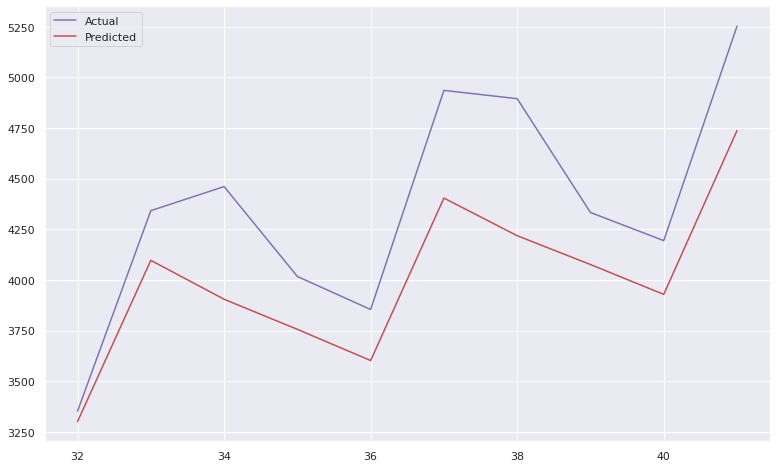

In [64]:
_,ax = plt.subplots(figsize = (13,8))
ax.plot(Test['Sales'], color = 'm', label = 'Actual')
ax.plot(pred_hwe_mul_add, color = 'r', label = 'Predicted')
plt.legend()

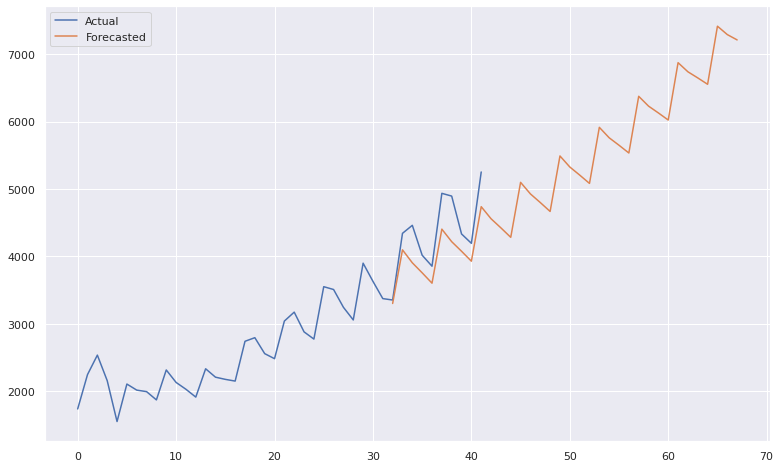

In [67]:
forecast = hwe_model_mul_add.forecast(steps = 36)
plt.figure(figsize = (13,8))
df['Sales'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


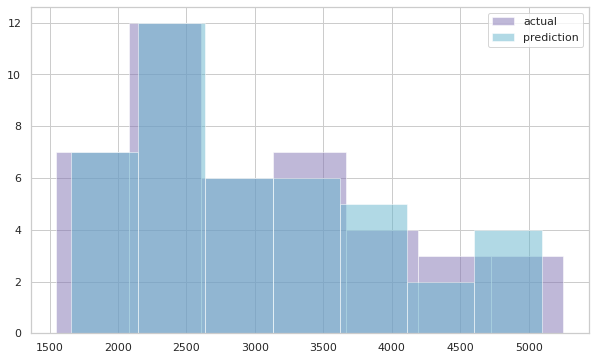

In [69]:
actual = df['Sales']
hw_model_mul_mul = ExponentialSmoothing(df["Sales"], trend = 'mul', seasonal='add', seasonal_periods=12).fit()
pred_final= hw_model_mul_mul.predict(start = df.index[0], end = df.index[-1])

# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(actual, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.legend(loc = 'best')
plt.show()